In [1]:
import pandas as pd
import numpy as np

%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns



In [2]:
data = pd.read_csv('OnlineRetail2.csv',encoding= 'unicode_escape')

In [3]:
data.head()

,Unnamed: 0,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Dist
0,0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,Kolakata
1,1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,Kolakata
2,2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,Kolakata
3,3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,Kolakata
4,4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,Kolakata


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541424 entries, 0 to 541423
Data columns (total 9 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   Unnamed: 0   541424 non-null  int64  
 1   InvoiceNo    541424 non-null  object 
 2   StockCode    541424 non-null  object 
 3   Description  539970 non-null  object 
 4   Quantity     541424 non-null  int64  
 5   InvoiceDate  541424 non-null  object 
 6   UnitPrice    541424 non-null  float64
 7   CustomerID   406346 non-null  float64
 8   Dist         510330 non-null  object 
dtypes: float64(2), int64(2), object(5)
memory usage: 37.2+ MB


###  we can build our North Star Metric equation:
###   example -Revenue = Active Customer Count * Order Count * Average Revenue per Order

In [5]:
# Convert the invoice date from string to datetime
data['InvoiceDate'] = pd.to_datetime(data['InvoiceDate'])

In [6]:
# create YearMonth field for the ease of reporting  and visualisation 
data['InvoiceYearMonth'] = data['InvoiceDate'].map(lambda date: 100*date.year + date.month)

In [7]:
data['InvoiceYearMonth']

0         201012
1         201012
2         201012
3         201012
4         201012
           ...  
541419    201112
541420    201112
541421    201112
541422    201112
541423    201112
Name: InvoiceYearMonth, Length: 541424, dtype: int64

#### calculate Revenue for each row and create a new dataframe with YearMonth - Revenue columns

In [8]:
data["Revenue"] = data['UnitPrice']*data['Quantity']
d_Revenue = data.groupby('InvoiceYearMonth').agg({'Revenue':'sum'}).reset_index()

In [9]:
# d_Revenue.to_csv('d_Revenue.csv')

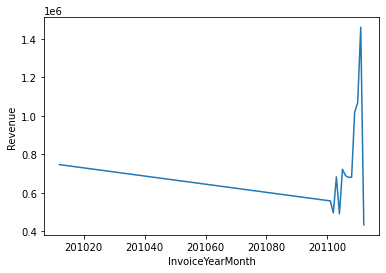

In [10]:
sns.lineplot(d_Revenue['InvoiceYearMonth'],d_Revenue['Revenue'])
# plt.plot(d_Revenue['InvoiceYearMonth'])
# plt.plot(d_Revenue['Revenue'])

#####  Monthly Revenue Growth

In [11]:
d_Revenue['MonthlyGrowth'] = data['Revenue'].pct_change()

In [12]:
d_Revenue

,InvoiceYearMonth,Revenue,MonthlyGrowth
0,201012,747090.220,NaN
1,201101,558512.120,0.329412
2,201102,496478.230,0.081613
3,201103,683281.830,-0.075455
4,201104,491929.631,0.000000
5,201105,722785.110,-0.247788
6,201106,689849.160,0.666667
7,201107,680623.311,-0.564706
8,201108,681577.260,0.000000
9,201109,1018674.582,3.872072


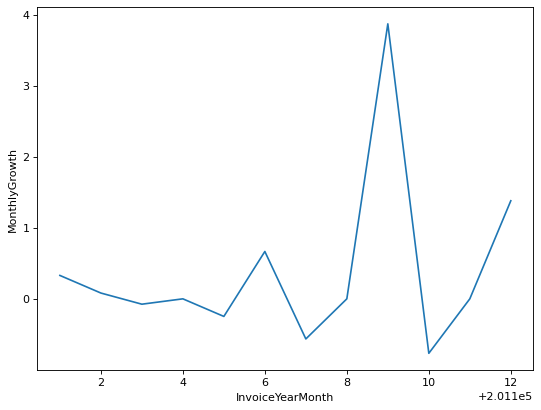

In [13]:
plt.figure(figsize=(8, 6), dpi=80)
sns.lineplot('InvoiceYearMonth','MonthlyGrowth',data = d_Revenue)

#### Monthly active customers


#####  i will focus on kolkata because it has a the most records 

In [14]:
df_kol = data.query("Dist == 'Kolakata'").reset_index(drop = True)

In [15]:
df_kol.head()

,Unnamed: 0,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Dist,InvoiceYearMonth,Revenue
0,0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,Kolakata,201012,15.30
1,1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,Kolakata,201012,20.34
2,2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,Kolakata,201012,22.00
3,3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,Kolakata,201012,20.34
4,4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,Kolakata,201012,20.34


In [16]:
mon_active_users = df_kol.groupby('InvoiceYearMonth').agg({'CustomerID':'nunique'}).reset_index()

In [17]:
mon_active_users # no. of active users per month 

,InvoiceYearMonth,CustomerID
0,201012,871
1,201101,684
2,201102,714
3,201103,923
4,201104,817
5,201105,985
6,201106,943
7,201107,899
8,201108,867
9,201109,1177


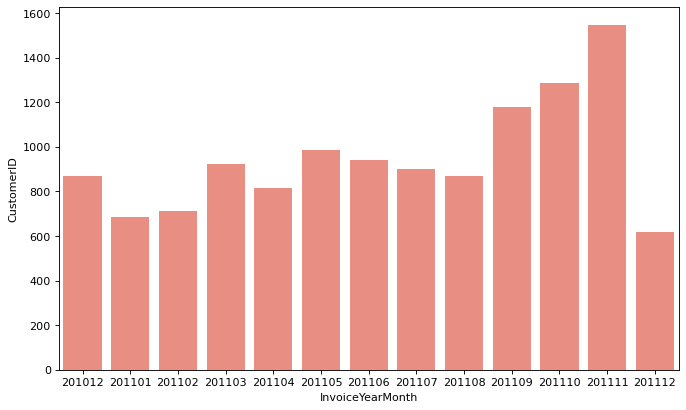

In [50]:
plt.figure(figsize=(10, 6), dpi=80)
sns.barplot('InvoiceYearMonth', 'CustomerID', color="salmon",data = mon_active_users)

#### In April, Monthly Active Customer number dropped to 817 from 923 (-11.5%).
### We will see the same trend for number of orders as well.

In [19]:
mon_sales  = df_kol.groupby('InvoiceYearMonth').agg({'Quantity':'sum'}).reset_index()

In [20]:
mon_sales

,InvoiceYearMonth,Quantity
0,201012,298101
1,201101,237381
2,201102,225641
3,201103,279843
4,201104,257666
5,201105,306452
6,201106,258522
7,201107,324129
8,201108,319804
9,201109,458490


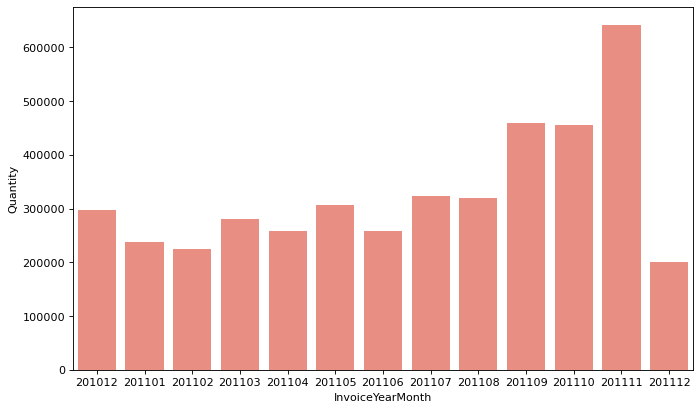

In [21]:
plt.figure(figsize=(10, 6), dpi=80)
sns.barplot('InvoiceYearMonth','Quantity',data = mon_sales,color="salmon") # palette="Blues_d"

## We know that Active Customer Count directly affected Order Count decrease. At the end, we should definitely check our Average Revenue per Month as well.

In [22]:
monthly_avg_rev = df_kol.groupby('InvoiceYearMonth').agg({'Revenue':'mean'}).reset_index()

In [23]:
monthly_avg_rev

,InvoiceYearMonth,Revenue
0,201012,16.865860
1,201101,13.614680
2,201102,16.093027
3,201103,16.716166
4,201104,15.773380
5,201105,17.713823
6,201106,16.714748
7,201107,15.723497
8,201108,17.315899
9,201109,18.931723


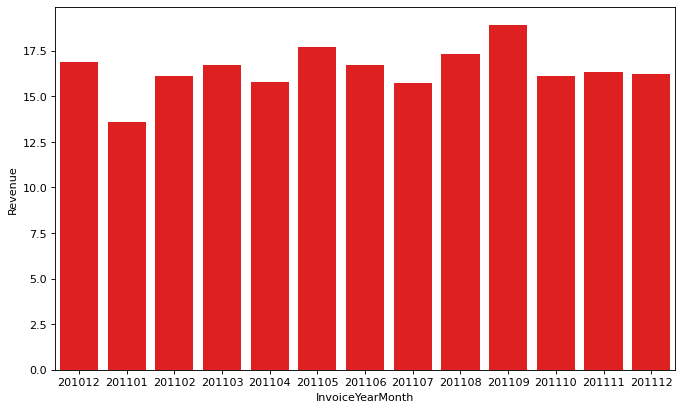

In [24]:
plt.figure(figsize=(10, 6), dpi=80)
sns.barplot('InvoiceYearMonth','Revenue',data = monthly_avg_rev,color = 'red')

## New Customer Ratio: a good indicator of if we are losing our existing customers or unable to attract new ones
## Retention Rate: King of the metrics. Indicates how many customers we retain over specific time window. We will be showing examples for monthly retention rate and cohort based retention rate.

In [25]:
# dataframe containing CustomerID and First purchase date

In [26]:
min_purchase_dt = df_kol.groupby('CustomerID').agg({'InvoiceDate':'min'}).reset_index()

In [27]:
min_purchase_dt

,CustomerID,InvoiceDate
0,12346.0,2011-01-18 10:01:00
1,12747.0,2010-12-05 15:38:00
2,12748.0,2010-12-01 12:48:00
3,12749.0,2011-05-10 15:25:00
4,12820.0,2011-01-17 12:34:00
...,...,...
3945,18280.0,2011-03-07 09:52:00
3946,18281.0,2011-06-12 10:53:00
3947,18282.0,2011-08-05 13:35:00
3948,18283.0,2011-01-06 14:14:00


In [28]:
min_purchase_dt.columns = ['CustomerID','MinPurchaseDate']

In [29]:
min_purchase_dt['MinPurchaseYearMonth'] = min_purchase_dt['MinPurchaseDate'].map(lambda date : 100*date.year + date.month)

In [30]:
min_purchase_dt

,CustomerID,MinPurchaseDate,MinPurchaseYearMonth
0,12346.0,2011-01-18 10:01:00,201101
1,12747.0,2010-12-05 15:38:00,201012
2,12748.0,2010-12-01 12:48:00,201012
3,12749.0,2011-05-10 15:25:00,201105
4,12820.0,2011-01-17 12:34:00,201101
...,...,...,...
3945,18280.0,2011-03-07 09:52:00,201103
3946,18281.0,2011-06-12 10:53:00,201106
3947,18282.0,2011-08-05 13:35:00,201108
3948,18283.0,2011-01-06 14:14:00,201101


In [31]:
df_kol = pd.merge(df_kol,min_purchase_dt,on = 'CustomerID')

In [32]:
df_kol.shape

(361878, 13)

In [33]:
df_kol.head(100)

,Unnamed: 0,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Dist,InvoiceYearMonth,Revenue,MinPurchaseDate,MinPurchaseYearMonth
0,0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,Kolakata,201012,15.30,2010-12-01 08:26:00,201012
1,1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,Kolakata,201012,20.34,2010-12-01 08:26:00,201012
2,2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,Kolakata,201012,22.00,2010-12-01 08:26:00,201012
3,3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,Kolakata,201012,20.34,2010-12-01 08:26:00,201012
4,4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,Kolakata,201012,20.34,2010-12-01 08:26:00,201012
...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,3129,536600,21730,GLASS STAR FROSTED T-LIGHT HOLDER,4,2010-12-02 08:32:00,4.25,17850.0,Kolakata,201012,17.00,2010-12-01 08:26:00,201012
96,3130,536601,22632,HAND WARMER RED POLKA DOT,6,2010-12-02 08:33:00,1.85,17850.0,Kolakata,201012,11.10,2010-12-01 08:26:00,201012
97,3131,536601,22633,HAND WARMER UNION JACK,6,2010-12-02 08:33:00,1.85,17850.0,Kolakata,201012,11.10,2010-12-01 08:26:00,201012
98,3132,536602,37370,RETRO COFFEE MUGS ASSORTED,6,2010-12-02 08:34:00,1.06,17850.0,Kolakata,201012,6.36,2010-12-01 08:26:00,201012


In [34]:
df_kol['UserType'] = 'New'
df_kol.loc[df_kol['InvoiceYearMonth'] > df_kol['MinPurchaseYearMonth'],'UserType'] ='Existing' # where boolean is true

In [35]:
df_kol.head()

,Unnamed: 0,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Dist,InvoiceYearMonth,Revenue,MinPurchaseDate,MinPurchaseYearMonth,UserType
0,0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,Kolakata,201012,15.30,2010-12-01 08:26:00,201012,New
1,1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,Kolakata,201012,20.34,2010-12-01 08:26:00,201012,New
2,2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,Kolakata,201012,22.00,2010-12-01 08:26:00,201012,New
3,3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,Kolakata,201012,20.34,2010-12-01 08:26:00,201012,New
4,4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,Kolakata,201012,20.34,2010-12-01 08:26:00,201012,New


In [36]:
# calculate Revenue per month for each UserType

In [37]:
user_type_rev = df_kol.groupby(['InvoiceYearMonth','UserType']).agg({'Revenue':'sum'}).reset_index()


In [38]:
user_type_rev = user_type_rev[(user_type_rev['InvoiceYearMonth'] != 201012) & (user_type_rev['InvoiceYearMonth'] != 201112)]

In [39]:
user_type_rev

,InvoiceYearMonth,UserType,Revenue
1,201101,Existing,195275.510
2,201101,New,156705.770
3,201102,Existing,220994.630
4,201102,New,127859.000
5,201103,Existing,296350.030
6,201103,New,160567.840
7,201104,Existing,268226.660
8,201104,New,108517.751
9,201105,Existing,434725.860
10,201105,New,90847.490


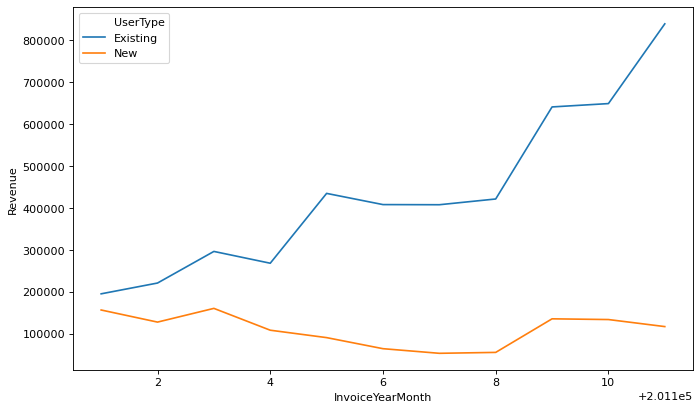

In [40]:
plt.figure(figsize=(10, 6), dpi=80)
sns.lineplot('InvoiceYearMonth','Revenue',hue = 'UserType', data = user_type_rev )

##### Existing customers are showing a positive trend and tell us that our customer base is growing but new customers have a slight negative trend.

## New Customer Ratio:

In [41]:
new_user_ratio = df_kol.query("UserType == 'New'")

In [42]:
new_user_ratio = new_user_ratio.groupby('InvoiceYearMonth').agg({'CustomerID':'nunique'})

In [43]:
# new_user_ratio.reset_index(inplace = True)

In [44]:
new_user_ratio#.set_index('InvoiceYearMonth')

,CustomerID
InvoiceYearMonth,
201012,871
201101,362
201102,339
201103,408
201104,276
201105,252
201106,207
201107,172
201108,140


In [45]:
new_user_ratio = new_user_ratio / df_kol.query("UserType == 'Existing'").groupby('InvoiceYearMonth').agg({'CustomerID':'nunique'})

In [52]:
# df_kol.query("UserType == 'Existing'").groupby('InvoiceYearMonth').agg({'CustomerID':'nunique'})

In [53]:
new_user_ratio.columns = ['No.of Customers_Ratio'] # every month of unique customers(new) divided by Total customers in that particular month 

In [54]:
new_user_ratio

,No.of Customers_Ratio
InvoiceYearMonth,
201012,NaN
201101,1.124224
201102,0.904000
201103,0.792233
201104,0.510166
201105,0.343793
201106,0.281250
201107,0.236589
201108,0.192572


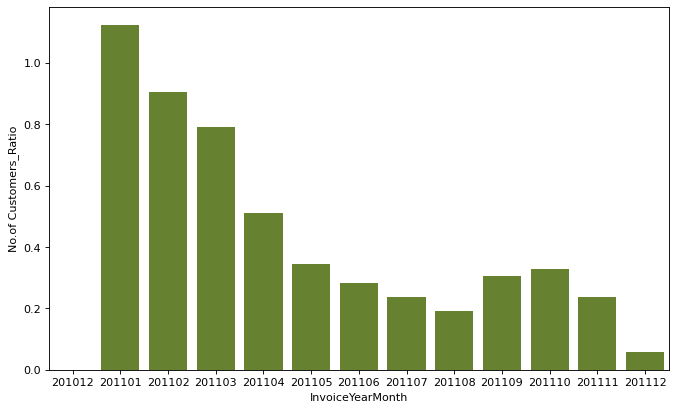

In [55]:
plt.figure(figsize=(10, 6), dpi=80)
sns.barplot(new_user_ratio.index,'No.of Customers_Ratio',data = new_user_ratio,color = 'olivedrab')

###  New Customer Ratio has declined 

# Monthly Retention Rate

###  how well your product fits the market.

#### For making Monthly Retention Rate visualized, we need to calculate how many customers retained from previous month.

## Monthly Retention Rate = Retained Customers From Prev. Month/Active Customers Total

### we create a dataframe that shows total monthly revenue for each customer:

In [84]:
user_purchase = df_kol.groupby(['CustomerID','InvoiceYearMonth']).agg({'Revenue':'sum'}).reset_index()
user_purchase

,CustomerID,InvoiceYearMonth,Revenue
0,12346.0,201101,0.00
1,12747.0,201012,706.27
2,12747.0,201101,303.04
3,12747.0,201103,310.78
4,12747.0,201105,771.31
...,...,...,...
12325,18283.0,201110,114.65
12326,18283.0,201111,651.56
12327,18283.0,201112,208.00
12328,18287.0,201105,765.28


In [85]:
retention = pd.crosstab(user_purchase['CustomerID'], user_purchase['InvoiceYearMonth'])

In [86]:
retention

InvoiceYearMonth,201012,201101,201102,201103,201104,201105,201106,201107,201108,201109,201110,201111,201112
CustomerID,,,,,,,,,,,,,
12346.0,0,1,0,0,0,0,0,0,0,0,0,0,0
12747.0,1,1,0,1,0,1,1,0,1,0,1,1,1
12748.0,1,1,1,1,1,1,1,1,1,1,1,1,1
12749.0,0,0,0,0,0,1,0,0,1,0,0,1,1
12820.0,0,1,0,0,0,0,0,0,0,1,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
18280.0,0,0,0,1,0,0,0,0,0,0,0,0,0
18281.0,0,0,0,0,0,0,1,0,0,0,0,0,0
18282.0,0,0,0,0,0,0,0,0,1,0,0,0,1


In [87]:
months = retention.columns[1:]
retention_array = []
for i in range(len(months)-1):
    retention_data = {}
    selected_month = months[i+1] #    2
    prev_month = months[i]   #    1
    
    retention_data['InvoiceYearMonth'] = int(selected_month)
    retention_data['TotalUserCount'] = retention[selected_month].sum()
    retention_data['RetainedUserCount']  = retention[(retention[selected_month] > 0 ) & (retention[prev_month]>0)][selected_month].sum()
    retention_array.append(retention_data)
    

In [88]:
retention_array

[{'InvoiceYearMonth': 201102, 'TotalUserCount': 714, 'RetainedUserCount': 263},
 {'InvoiceYearMonth': 201103, 'TotalUserCount': 923, 'RetainedUserCount': 305},
 {'InvoiceYearMonth': 201104, 'TotalUserCount': 817, 'RetainedUserCount': 310},
 {'InvoiceYearMonth': 201105, 'TotalUserCount': 985, 'RetainedUserCount': 369},
 {'InvoiceYearMonth': 201106, 'TotalUserCount': 943, 'RetainedUserCount': 417},
 {'InvoiceYearMonth': 201107, 'TotalUserCount': 899, 'RetainedUserCount': 379},
 {'InvoiceYearMonth': 201108, 'TotalUserCount': 867, 'RetainedUserCount': 391},
 {'InvoiceYearMonth': 201109,
  'TotalUserCount': 1177,
  'RetainedUserCount': 417},
 {'InvoiceYearMonth': 201110,
  'TotalUserCount': 1285,
  'RetainedUserCount': 502},
 {'InvoiceYearMonth': 201111,
  'TotalUserCount': 1548,
  'RetainedUserCount': 616},
 {'InvoiceYearMonth': 201112, 'TotalUserCount': 617, 'RetainedUserCount': 402}]

In [89]:
retention = pd.DataFrame(retention_array)

In [90]:
retention['RetentionRate'] = retention['RetainedUserCount'] / retention['TotalUserCount']

In [91]:
retention

,InvoiceYearMonth,TotalUserCount,RetainedUserCount,RetentionRate
0,201102,714,263,0.368347
1,201103,923,305,0.330444
2,201104,817,310,0.379437
3,201105,985,369,0.374619
4,201106,943,417,0.442206
5,201107,899,379,0.421580
6,201108,867,391,0.450980
7,201109,1177,417,0.354291
8,201110,1285,502,0.390661
9,201111,1548,616,0.397933


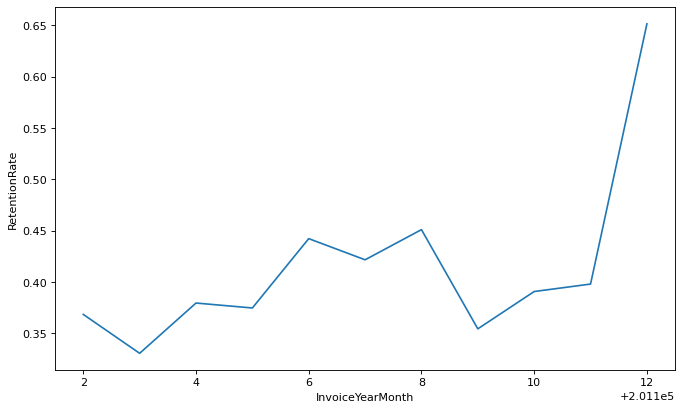

In [92]:
plt.figure(figsize=(10, 6), dpi=80)
sns.lineplot('InvoiceYearMonth','RetentionRate',data = retention)

In [93]:
retention2 = pd.crosstab(user_purchase['CustomerID'], user_purchase['InvoiceYearMonth'])

In [94]:
retention2

InvoiceYearMonth,201012,201101,201102,201103,201104,201105,201106,201107,201108,201109,201110,201111,201112
CustomerID,,,,,,,,,,,,,
12346.0,0,1,0,0,0,0,0,0,0,0,0,0,0
12747.0,1,1,0,1,0,1,1,0,1,0,1,1,1
12748.0,1,1,1,1,1,1,1,1,1,1,1,1,1
12749.0,0,0,0,0,0,1,0,0,1,0,0,1,1
12820.0,0,1,0,0,0,0,0,0,0,1,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
18280.0,0,0,0,1,0,0,0,0,0,0,0,0,0
18281.0,0,0,0,0,0,0,1,0,0,0,0,0,0
18282.0,0,0,0,0,0,0,0,0,1,0,0,0,1


In [95]:
retention2 = pd.merge(retention2,min_purchase_dt[['CustomerID','MinPurchaseYearMonth']],on = 'CustomerID')

In [96]:
retention2

,CustomerID,201012,201101,201102,201103,201104,201105,201106,201107,201108,201109,201110,201111,201112,MinPurchaseYearMonth
0,12346.0,0,1,0,0,0,0,0,0,0,0,0,0,0,201101
1,12747.0,1,1,0,1,0,1,1,0,1,0,1,1,1,201012
2,12748.0,1,1,1,1,1,1,1,1,1,1,1,1,1,201012
3,12749.0,0,0,0,0,0,1,0,0,1,0,0,1,1,201105
4,12820.0,0,1,0,0,0,0,0,0,0,1,1,0,1,201101
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3945,18280.0,0,0,0,1,0,0,0,0,0,0,0,0,0,201103
3946,18281.0,0,0,0,0,0,0,1,0,0,0,0,0,0,201106
3947,18282.0,0,0,0,0,0,0,0,0,1,0,0,0,1,201108
3948,18283.0,0,1,1,0,1,1,1,1,0,1,1,1,1,201101


In [97]:
new_col_names = ['m_' + str(column) for column in retention2.columns[:-1]]

In [98]:
new_col_names.append('MinPurchaseYearMonth')

In [99]:
retention2.columns  = new_col_names

In [100]:
retention2

,m_CustomerID,m_201012,m_201101,m_201102,m_201103,m_201104,m_201105,m_201106,m_201107,m_201108,m_201109,m_201110,m_201111,m_201112,MinPurchaseYearMonth
0,12346.0,0,1,0,0,0,0,0,0,0,0,0,0,0,201101
1,12747.0,1,1,0,1,0,1,1,0,1,0,1,1,1,201012
2,12748.0,1,1,1,1,1,1,1,1,1,1,1,1,1,201012
3,12749.0,0,0,0,0,0,1,0,0,1,0,0,1,1,201105
4,12820.0,0,1,0,0,0,0,0,0,0,1,1,0,1,201101
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3945,18280.0,0,0,0,1,0,0,0,0,0,0,0,0,0,201103
3946,18281.0,0,0,0,0,0,0,1,0,0,0,0,0,0,201106
3947,18282.0,0,0,0,0,0,0,0,0,1,0,0,0,1,201108
3948,18283.0,0,1,1,0,1,1,1,1,0,1,1,1,1,201101


In [101]:
# #create the array of Retained users for each cohort monthly

In [102]:
retention_array = []  
for i in range(len(months)):   # from 201101
    retention_data = {}
    selected_month = months[i] # 201101
    prev_months = months[:i]  #  here empty coz nothing before 201101
    next_months = months[i+1:] # 201102 to 201112
    for prev_month in prev_months:  
        retention_data[prev_month] = np.nan  # prev_month is empty so nothing happens 
    # total user count in this particular month 
    total_user_count = retention2[retention2['MinPurchaseYearMonth'] == selected_month]['MinPurchaseYearMonth'].count() # can't be sum(0&1)
    retention_data['TotalUserCount'] = total_user_count
    retention_data[selected_month] = 1 #  now retention data has selected month as 1  but selected month is still 201101
    
    query = "MinPurchaseYearMonth == {}".format(selected_month)
    
    for next_month in next_months: # start with 201102
        new_query = query + "and {} > 0".format(str('m_'+ str(next_month)))   # here in 1st loop 201101 & 201102
        retention_data[next_month] = np.round(retention2.query(new_query)['m_' + str(next_month)].sum()/total_user_count,2) # active users now divide by total users in previous month
    retention_array.append(retention_data)

retention2 = pd.DataFrame(retention_array)
retention2.index = months 

retention2
    

,TotalUserCount,201101,201102,201103,201104,201105,201106,201107,201108,201109,201110,201111,201112
InvoiceYearMonth,,,,,,,,,,,,,
201101,362,1.0,0.23,0.28,0.25,0.34,0.29,0.26,0.26,0.31,0.35,0.36,0.15
201102,339,NaN,1.00,0.25,0.19,0.28,0.28,0.25,0.26,0.28,0.28,0.31,0.10
201103,408,NaN,NaN,1.00,0.19,0.26,0.22,0.23,0.17,0.26,0.24,0.29,0.09
201104,276,NaN,NaN,NaN,1.00,0.22,0.22,0.22,0.21,0.23,0.23,0.26,0.08
201105,252,NaN,NaN,NaN,NaN,1.00,0.23,0.17,0.17,0.21,0.24,0.27,0.10
201106,207,NaN,NaN,NaN,NaN,NaN,1.00,0.21,0.16,0.25,0.26,0.32,0.10
201107,172,NaN,NaN,NaN,NaN,NaN,NaN,1.00,0.20,0.19,0.23,0.28,0.11
201108,140,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.00,0.26,0.23,0.26,0.14
201109,275,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.00,0.29,0.33,0.12


In [75]:
months2 = []

In [76]:
d1 = [1,0,0,0,0,0,1]
d = pd.DataFrame(d1)
d
#d[d >=0].count()
d[d >=0].sum()

0    2
dtype: int64

In [77]:
retention_array

[{'TotalUserCount': 362,
  201101: 1,
  201102: 0.23,
  201103: 0.28,
  201104: 0.25,
  201105: 0.34,
  201106: 0.29,
  201107: 0.26,
  201108: 0.26,
  201109: 0.31,
  201110: 0.35,
  201111: 0.36,
  201112: 0.15},
 {201101: nan,
  'TotalUserCount': 339,
  201102: 1,
  201103: 0.25,
  201104: 0.19,
  201105: 0.28,
  201106: 0.28,
  201107: 0.25,
  201108: 0.26,
  201109: 0.28,
  201110: 0.28,
  201111: 0.31,
  201112: 0.1},
 {201101: nan,
  201102: nan,
  'TotalUserCount': 408,
  201103: 1,
  201104: 0.19,
  201105: 0.26,
  201106: 0.22,
  201107: 0.23,
  201108: 0.17,
  201109: 0.26,
  201110: 0.24,
  201111: 0.29,
  201112: 0.09},
 {201101: nan,
  201102: nan,
  201103: nan,
  'TotalUserCount': 276,
  201104: 1,
  201105: 0.22,
  201106: 0.22,
  201107: 0.22,
  201108: 0.21,
  201109: 0.23,
  201110: 0.23,
  201111: 0.26,
  201112: 0.08},
 {201101: nan,
  201102: nan,
  201103: nan,
  201104: nan,
  'TotalUserCount': 252,
  201105: 1,
  201106: 0.23,
  201107: 0.17,
  201108: 0.17,
 

In [ ]:
d_Revenue.to_csv('d_Revenue.csv')
user_type_rev.to_csv('user_type_rev.csv')
new_user_ratio.to_csv('new_user_ratio.csv')
mon_active_users.to_csv('mon_active_users.csv')
mon_sales.to_csv('mon_sales.csv')
monthly_avg_rev.to_csv('monthly_avg_rev.csv')
retention.to_csv('retention.csv')
retention2.to_csv('retention2.csv')